### Import

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [24]:
dailyActivity= '../Dataset/dailyActivity_merged.csv'
df = pd.read_csv(dailyActivity)
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

### Preprocessing

In [26]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)


Missing values per column:
Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


In [27]:
# Check duplicated rows
duplicated_data = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicated_data}")

# Drop duplicates if needed
df = df.drop_duplicates()


Number of duplicated rows: 0


In [28]:
print(df[['TotalSteps', 'Calories']].describe())

def remove_outliers(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    upper_limit = mean + threshold * std
    lower_limit = mean - threshold * std
    return df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

# Removing outliers (optional, only if needed)
df_cleaned = remove_outliers(df, 'TotalSteps')
df_cleaned = remove_outliers(df_cleaned, 'Calories')

         TotalSteps     Calories
count    940.000000   940.000000
mean    7637.910638  2303.609574
std     5087.150742   718.166862
min        0.000000     0.000000
25%     3789.750000  1828.500000
50%     7405.500000  2134.000000
75%    10727.000000  2793.250000
max    36019.000000  4900.000000


In [29]:
# Convert 'ActivityDate' to datetime format for time-based analysis
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

#### Feature Encoding tidak dilakukan karena semua fitur numerik
#### Handle Class Imbalance tidak dilakukan karena kasus regresi

### Feature Selection

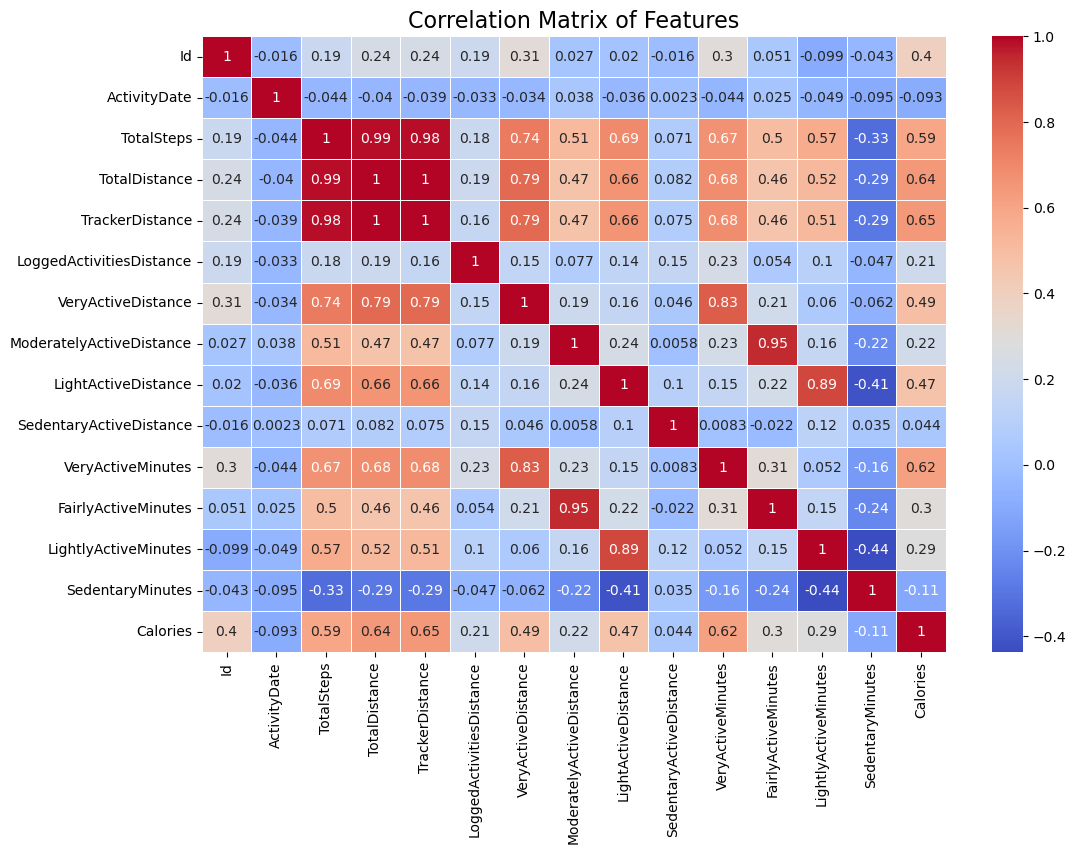

In [30]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix of Features', fontsize=16)

plt.show()



In [31]:
df_selected = df.drop(columns=['Id','ActivityDate','TrackerDistance', 'LoggedActivitiesDistance'])
print("Dropped features: 'TrackerDistance', 'LoggedActivitiesDistance'")

Dropped features: 'TrackerDistance', 'LoggedActivitiesDistance'


### Feature Extraction 

In [32]:
# Feature 1: Active Ratio (Total active minutes / 1440 minutes in a day)
df_selected['ActiveRatio'] = (df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes']) / 1440

# Feature 2: Sedentary Ratio (Sedentary minutes / 1440 minutes in a day)
df_selected['SedentaryRatio'] = df['SedentaryMinutes'] / 1440

# Feature 3: Active to Calories Ratio (Total active minutes / Calories burned)
df_selected['ActiveToCaloriesRatio'] = (df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes']) / df['Calories']

# Feature 4: Intensity Level based on Total Steps (e.g., low: <5000, medium: 5000-10000, high: >10000 steps)
def intensity_level(steps):
    if steps < 5000:
        return 'Low'
    elif steps <= 10000:
        return 'Medium'
    else:
        return 'High'

df_selected['IntensityLevel'] = df['TotalSteps'].apply(intensity_level)

df_selected.head()

,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveRatio,SedentaryRatio,ActiveToCaloriesRatio,IntensityLevel
0,13162,8.50,1.88,0.55,6.06,0.0,25,13,328,728,1985,0.254167,0.505556,0.184383,High
1,10735,6.97,1.57,0.69,4.71,0.0,21,19,217,776,1797,0.178472,0.538889,0.143016,High
2,10460,6.74,2.44,0.40,3.91,0.0,30,11,181,1218,1776,0.154167,0.845833,0.125000,High
3,9762,6.28,2.14,1.26,2.83,0.0,29,34,209,726,1745,0.188889,0.504167,0.155874,Medium
4,12669,8.16,2.71,0.41,5.04,0.0,36,10,221,773,1863,0.185417,0.536806,0.143317,High


- ActiveRatio dan SedentaryRatio: Fitur-fitur ini memberikan gambaran proporsi waktu aktif dan tidak aktif pengguna dalam sehari.
- ActiveToCaloriesRatio: Fitur ini menunjukkan efisiensi kalori yang terbakar berdasarkan waktu aktif, yang mungkin menjadi indikator kebugaran.
- IntensityLevel: Mengkategorikan pengguna berdasarkan tingkat aktivitasnya berdasarkan langkah harian mereka.